In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt

In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0
...,...,...,...,...,...,...,...,...,...,...
44000,35,UNI,Unicaja,2021-03-24,0.802000,0.822000,0.786500,0.819500,0.751219,2616012
44001,35,UNI,Unicaja,2021-03-23,0.770000,0.807500,0.762500,0.802500,0.735636,2436213
44002,35,UNI,Unicaja,2021-03-22,0.780000,0.780500,0.760000,0.764000,0.700343,1420069
44003,35,UNI,Unicaja,2021-03-30,0.867000,0.878500,0.855500,0.877500,0.804387,3028721


In [3]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

acerinox = df[df['empresa'] == 'Acerinox']

acerinox.shape

(1325, 10)

In [4]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

acerinox = acerinox [['date','open','high','low','close','adj close']]

acerinox.shape

(1325, 6)

In [5]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

acerinox['date'] = pd.to_datetime(acerinox['date'], format="%Y-%m-%d")

acerinox.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 2000 to 3324
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [6]:
# Paso 5: Ordenar el DF por fecha

acerinox.sort_values(by='date',ascending= True, inplace=True)

acerinox.head()

,date,open,high,low,close,adj close
2435,2019-01-02,8.640,8.642,8.350,8.582,5.994900
2436,2019-01-03,8.526,8.576,8.402,8.406,5.871956
2437,2019-01-04,8.516,8.898,8.510,8.882,6.204463
2438,2019-01-07,8.994,9.054,8.776,8.976,6.270126
2439,2019-01-08,8.968,9.340,8.968,9.200,6.426599


In [8]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-07-05'
fecha_fin = '2024-03-01'

acerinox = acerinox[(acerinox['date'] >= fecha_inicio) & (acerinox['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

acerinox.shape

(684, 6)

In [9]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=acerinox['date'].min(), end=acerinox['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

acerinox = acerinox.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

acerinox = acerinox.rename(columns={'index': 'date'})

In [10]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

acerinox.head(10)

,date,open,high,low,close,adj close
0,2021-07-05,10.460,10.595,10.435,10.560,9.118491
1,2021-07-06,10.515,10.595,10.150,10.200,8.807632
2,2021-07-07,10.255,10.395,10.155,10.375,8.958744
3,2021-07-08,10.390,10.390,10.095,10.235,8.837853
4,2021-07-09,10.300,10.640,10.225,10.620,9.170299
5,2021-07-10,NaN,NaN,NaN,NaN,NaN
6,2021-07-11,NaN,NaN,NaN,NaN,NaN
7,2021-07-12,10.510,10.520,10.130,10.430,9.006236
8,2021-07-13,10.490,10.510,10.250,10.285,8.881029
9,2021-07-14,10.300,10.570,10.230,10.440,9.014871


In [11]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

acerinox = acerinox.fillna(method='ffill')

In [12]:
# Paso 10: Comprobar que se han introducido los valores correctamente


acerinox.head(10)

,date,open,high,low,close,adj close
0,2021-07-05,10.460,10.595,10.435,10.560,9.118491
1,2021-07-06,10.515,10.595,10.150,10.200,8.807632
2,2021-07-07,10.255,10.395,10.155,10.375,8.958744
3,2021-07-08,10.390,10.390,10.095,10.235,8.837853
4,2021-07-09,10.300,10.640,10.225,10.620,9.170299
5,2021-07-10,10.300,10.640,10.225,10.620,9.170299
6,2021-07-11,10.300,10.640,10.225,10.620,9.170299
7,2021-07-12,10.510,10.520,10.130,10.430,9.006236
8,2021-07-13,10.490,10.510,10.250,10.285,8.881029
9,2021-07-14,10.300,10.570,10.230,10.440,9.014871


In [13]:
# Paso 11: Establecer columna 'date' como índice para modelo

acerinox = acerinox.set_index('date')

acerinox.head(10)

,open,high,low,close,adj close
date,,,,,
2021-07-05,10.460,10.595,10.435,10.560,9.118491
2021-07-06,10.515,10.595,10.150,10.200,8.807632
2021-07-07,10.255,10.395,10.155,10.375,8.958744
2021-07-08,10.390,10.390,10.095,10.235,8.837853
2021-07-09,10.300,10.640,10.225,10.620,9.170299
2021-07-10,10.300,10.640,10.225,10.620,9.170299
2021-07-11,10.300,10.640,10.225,10.620,9.170299
2021-07-12,10.510,10.520,10.130,10.430,9.006236
2021-07-13,10.490,10.510,10.250,10.285,8.881029


In [14]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

acerinox.index = pd.DatetimeIndex(acerinox.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

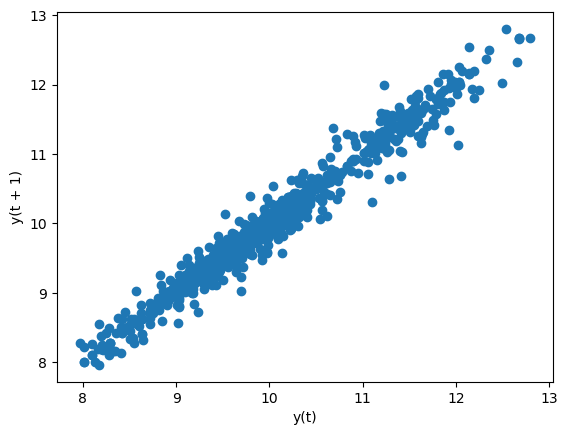

In [15]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

from pandas.plotting import lag_plot

lag_plot(acerinox.close)

In [16]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [17]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = acerinox.close[:-10], acerinox.close[-10:]

train.shape, test.shape

((961,), (10,))

In [18]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [19]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(acerinox.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    10.157881
2024-02-22    10.155791
2024-02-23    10.153730
2024-02-24    10.151697
2024-02-25    10.149692
2024-02-26    10.147716
2024-02-27    10.145766
2024-02-28    10.143843
2024-02-29    10.141947
2024-03-01    10.140077
Freq: D, dtype: float64

In [20]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    10.285
2024-02-22    10.360
2024-02-23    10.260
2024-02-24    10.260
2024-02-25    10.260
2024-02-26    10.230
2024-02-27    10.400
2024-02-28    10.200
2024-02-29    10.135
2024-03-01     9.574
Freq: D, Name: close, dtype: float64

In [21]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.16219083956102498

In [22]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,10.285,10.157881,-0.127119
2024-02-22,10.360,10.155791,-0.204209
2024-02-23,10.260,10.153730,-0.106270
2024-02-24,10.260,10.151697,-0.108303
2024-02-25,10.260,10.149692,-0.110308
2024-02-26,10.230,10.147716,-0.082284
2024-02-27,10.400,10.145766,-0.254234
2024-02-28,10.200,10.143843,-0.056157
2024-02-29,10.135,10.141947,0.006947
2024-03-01,9.574,10.140077,0.566077
